在 Python 中绘制图表有很多库可以供我们使用，Matplotlib 可能是 Python 2D-绘图领域使用最广泛的套件，这次我们就使用它来进行基础图形的绘制。

要使用 matplotlib 需要先安装它，在开始菜单打开命令提示符界面，输入下面命令即可安装：
```
pip install matplotlib
```

安装好了之后，可以先尝试绘制一张简单的折线图：

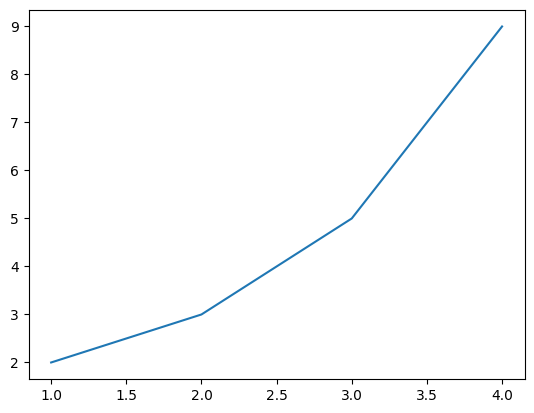

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


X = [1,2,3,4]
Y = [2,3,5,9]

plt.plot(X,Y)
plt.show()

可以看到绘制折线图比较简单，定义 X 轴的列表，与 Y 轴的列表，然后调用 plot() 函数即可。
基础图形可能不方便查看每个值是多少，可以加一些属性优化：

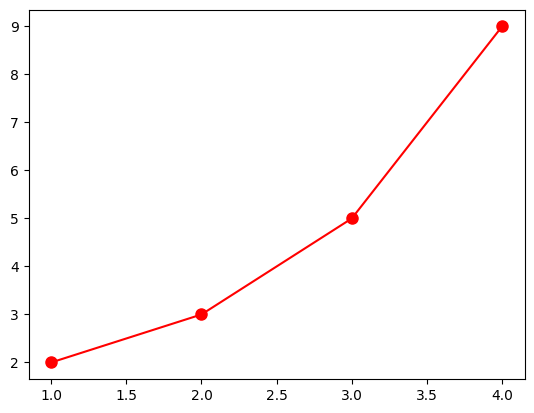

In [2]:
import matplotlib.pyplot as plt

X = [1,2,3,4]
Y = [2,3,5,9]
plt.plot(X,Y,color='r', marker='o',markersize=8)
plt.show()

了解了基本的绘制，就可以来绘制疫情新增数据折线图了。

第一步处理数据：

In [3]:
# info为疫情数据：包括日期和新增人数
# info为字符串，三引号中可以有特殊字符如换行符而不需转义
info = """2020-01-24    910
2020-01-25  539
2020-01-26  718
2020-01-27  889
2020-01-28  1811
2020-01-29  1529
2020-01-30  1797
2020-01-31  2057
2020-02-01  2196
2020-02-02  2661
2020-02-02  2661
2020-02-03  2940
2020-02-04  3256
2020-02-05  3948
2020-02-06  3798
2020-02-07  3167
2020-02-08  3455
2020-02-09  2654
2020-02-10  3009
2020-02-11  2469
2020-02-12  2121
2020-02-13  15178
2020-02-14  4059
2020-02-15  2632"""
# 在下面补充代码：创建一个空字典data
data = {}

# 在下面补充代码：将info按换行分割后重新赋给info
info1 = info.split("\n")
#print(info1)
#info1是一个列表

for line in info1:
    # 在下面补充代码：将line按空格分割后赋给line_split变量
    line_split = line.split()
    #print(line_split[0])
    #print(line_split[1])
    # 在下面补充代码：以line_split的第一个元素作为键，以line_split的第二个元素转为int后作为值，给data添加一个键值对
    data.update(dict( [ ( line_split[0], int(line_split[1]) )] ))

#print(type(dict([(line_split[0], line_split[1] )])))

print(data)

{'2020-01-24': 910, '2020-01-25': 539, '2020-01-26': 718, '2020-01-27': 889, '2020-01-28': 1811, '2020-01-29': 1529, '2020-01-30': 1797, '2020-01-31': 2057, '2020-02-01': 2196, '2020-02-02': 2661, '2020-02-03': 2940, '2020-02-04': 3256, '2020-02-05': 3948, '2020-02-06': 3798, '2020-02-07': 3167, '2020-02-08': 3455, '2020-02-09': 2654, '2020-02-10': 3009, '2020-02-11': 2469, '2020-02-12': 2121, '2020-02-13': 15178, '2020-02-14': 4059, '2020-02-15': 2632}


在这里使用三个双引号可以表示多行的字符串，然后将字符串中的每一行数据提取出来成为我们想要的数据。

有了数据之后就可以进行绘图了：

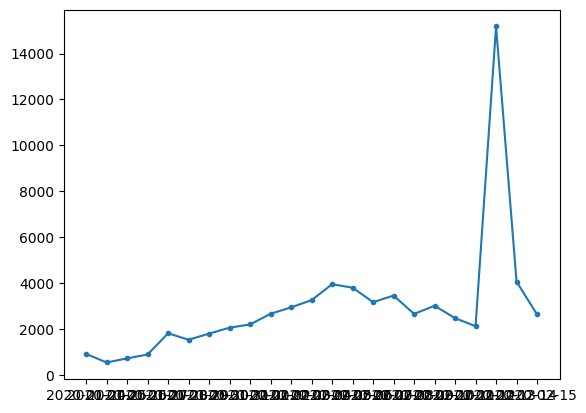

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# 在下面补充代码：将data的所有键转为列表赋给X变量
X = np.array( list (data.keys()) )
#print(type(X))
#print(X)
# 在下面补充代码：将data的所有值转为列表赋给Y变量
Y = np.array( list (data.values()) ) #知道为什么第一次是乱的吗？因为没有把Y里面的数据元素转换为int
# 在下面补充代码：根据X、Y数据画线形图，标记点为圆点，大小为5，颜色为红色
plt.plot(X,Y,marker = '.')
plt.show()

查看结果，发现 X 轴有些问题，这是因为日期作为 X 轴的坐标太长了，所以文字都挤在一起了，要解决这个问题可以将年份去掉，然后将 X 坐标旋转 45° 。

要将年份去掉可以有两种方法，1.直接使用字符串替换，2.转换日期类型然后提取具体数据，我们两种方法都来试试。

In [5]:
str_date = "2020-01-25"
# 方法 1
# 在下面补充代码：将str_date的'2020-0'替换成空字符
new_str = '1-25'
print(new_str)
# 方法 2 
import datetime
ymd = datetime.datetime.strptime(str_date, '%Y-%m-%d') # 将字符串转换为日期时间类型
m_d = str(ymd.month) + '-' + str(ymd.day) # 将月和日的数据进行字符串拼接
print(m_d)

1-25
1-25


虽然第一种方法看起来简单一点，但是方法 2 才能解决更多场景下的问题。

接下来再次尝试编写折线图，同时加上图的标题、Y 轴标签、X 轴标签，旋转 45 度：

['1-24', '1-25', '1-26', '1-27', '1-28', '1-29', '1-30', '1-31', '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '2-8', '2-9', '2-10', '2-11', '2-12', '2-13', '2-14', '2-15']


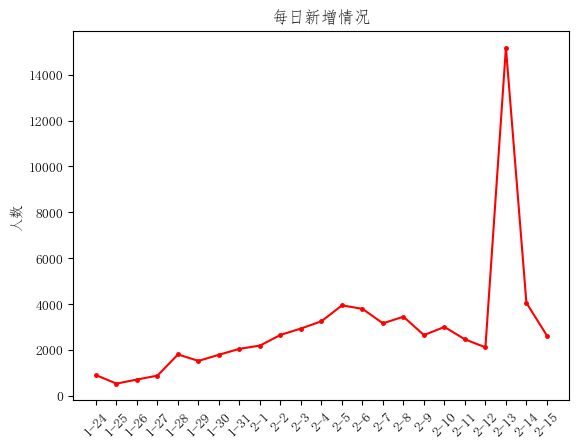

In [6]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'FangSong'  # 替换为你选择的字体
# 在下面补充代码：将data的所有键转为列表赋给X变量
X =  list (data.keys()) 

import datetime
# 在下面补充代码：创建空列表convert_X
convert_X = list()
for text in X:
    # 在下面补充代码：将text转换为日期时间类型，赋给y_m_d变量
    y_m_d = datetime.datetime.strptime(text, '%Y-%m-%d') # 将字符串转换为日期时间类型
    # 在下面补充代码：将月和日的数据用'-'进行拼接后赋给text1
    text1 = str(y_m_d.month) + '-' + str(y_m_d.day) # 将月和日的数据进行字符串拼接
    # 在下面补充代码：将text1追加到convert_X中
    convert_X.append(text1)

print(convert_X)
X = convert_X
# 在下面补充代码：将data的所有值转为列表赋给Y变量
Y =  list (data.values()) 

# 在下面补充代码：以月份为X数据，新增人数为Y数据，标记点为圆点，大小为5画线形图
plt.plot(X,Y,marker = '.',markersize=5,color='r')

# 在下面补充代码：x轴刻度标签旋转45度
plt.xticks(rotation = 45)
# 在下面补充代码：设置图标题为"每日新增情况"
plt.title("每日新增情况")
# 在下面补充代码：设置y轴标签为"人数"
plt.ylabel("人数")

plt.show()

结果出来了会发现又有一个问题，我们添加的标题和 Y 轴标签都不能正常显示。

这是因为 matplotlib 默认没有中文字体，要想让它支持中文还需要加上中文字体，加上字体设置就行了：

In [7]:
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#### 绘制确诊患者年龄分布比例

患者的年龄分布通过柱状图能很好的展示给查看数据的人，接下来咱们了解一下如何使用 matplotlib 绘制柱状图：

结果：

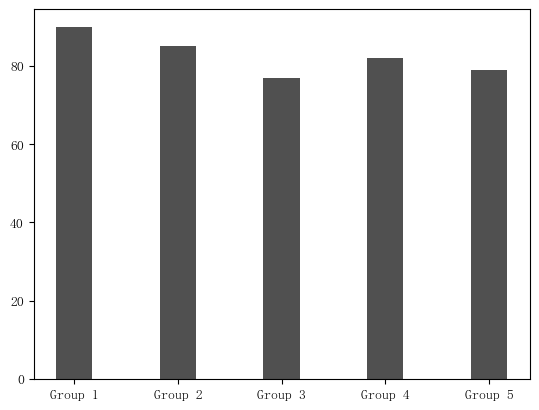

In [8]:
import matplotlib.pyplot as plt
# A 班计算机程序设计课 5 个小组的平均成绩柱状图
means_score = (90, 85, 77, 82, 79) # y 轴序列数据
index = [1,2,3,4,5] # x 轴序列数据
bar_width = 0.35 #条形宽度
# 在下面补充代码：绘制柱状图，颜色的透明程度为0.8，颜色为#505050

x_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'] 
plt.bar(x_labels, means_score, width=bar_width,color='#505050')
# 在下面补充代码：x轴刻度标签设置为x_labels
#plt.xlabel(x_labels)
plt.show()

可以发现和绘制折线图类似，只需要将 X 和 Y 轴数据处理好，然后设置一些图表的属性就能绘制出一张更方便查看的图表了。

接下来我们根据确诊患者年龄分布数据来绘制图表，数据如下：

In [9]:
{
    "age": [
        "0-10岁",
        "10-20岁",
        "20-30岁",
        "30-40岁",
        "40-50岁",
        "50-60岁",
        "60-70岁",
        "70-80岁",
        "80-90岁",
        "90-100岁"
    ],
    "data": {
        "男": [
            0.018656716417910446,
            0.05223880597014925,
            0.1455223880597015,
            0.25,
            0.2537313432835821,
            0.12313432835820895,
            0.08955223880597014,
            0.05223880597014925,
            0.014925373134328358,
            0.0
        ],
        "女": [
            0.031818181818181815,
            0.04090909090909091,
            0.11363636363636363,
            0.20909090909090908,
            0.21363636363636362,
            0.16818181818181818,
            0.1590909090909091,
            0.03636363636363636,
            0.02727272727272727,
            0.0
        ]
    }
}

{'age': ['0-10岁',
  '10-20岁',
  '20-30岁',
  '30-40岁',
  '40-50岁',
  '50-60岁',
  '60-70岁',
  '70-80岁',
  '80-90岁',
  '90-100岁'],
 'data': {'男': [0.018656716417910446,
   0.05223880597014925,
   0.1455223880597015,
   0.25,
   0.2537313432835821,
   0.12313432835820895,
   0.08955223880597014,
   0.05223880597014925,
   0.014925373134328358,
   0.0],
  '女': [0.031818181818181815,
   0.04090909090909091,
   0.11363636363636363,
   0.20909090909090908,
   0.21363636363636362,
   0.16818181818181818,
   0.1590909090909091,
   0.03636363636363636,
   0.02727272727272727,
   0.0]}}

查看这段数据是不是熟悉又有点陌生呢？

这段数据很像是第四章学习过的字典，不过它不是一个字典，这个数据其实是一段 json 数据（本质上还是字符串），json 数据格式是一种轻量级的数据交换格式，在互联网上进行数据传输几乎都用它。

现在我们要解决的问题就是从这段 json 数据中提取出我们想要的数据。

Python 中有一个专门用来处理 json 的库，使用它来处理 json 数据就会比较方便，使用 JSON 函数需要导入 json 库：import json。

json 库有两个常用函数：

|函数| 描述| 
|-|-| 
|json.dumps |将 Python 对象编码成 JSON 字符串| 
|json.loads |将已编码的 JSON 字符串解码为 Python 对象|

通过上面的了解可以知道，使用 loads() 函数可以帮助我们将json 数据转换成 Python 对象。

来尝试一下：

In [10]:
test_str = '{"key1":1,"key2":2}'
import json
info = json.loads(test_str)
print(info)

{'key1': 1, 'key2': 2}


可以看到上面的代码已经将 json 数据字符串转换为字典了。

接下来我们就可以处理确诊患者年龄分布的数据了：

In [11]:
json_str ="""
{
    "age": [
        "0-10岁",
        "10-20岁",
        "20-30岁",
        "30-40岁",
        "40-50岁",
        "50-60岁",
        "60-70岁",
        "70-80岁",
        "80-90岁",
        "90-100岁"
    ],
    "data": {
        "男": [
            0.018656716417910446,
            0.05223880597014925,
            0.1455223880597015,
            0.25,
            0.2537313432835821,
            0.12313432835820895,
            0.08955223880597014,
            0.05223880597014925,
            0.014925373134328358,
            0.0
        ],
        "女": [
            0.031818181818181815,
            0.04090909090909091,
            0.11363636363636363,
            0.20909090909090908,
            0.21363636363636362,
            0.16818181818181818,
            0.1590909090909091,
            0.03636363636363636,
            0.02727272727272727,
            0.0
        ]
    }
}"""
import json
# 在下面补充代码：将json_str解析为Python对象，赋给data变量
data1 = json.loads(json_str)
# 在下面补充代码：将data的'age'键对应的值赋给age_list变量
age_list = data1['age']
# 在下面补充代码：创建空列表value_list
value_list = list()
# 计算每个年龄段的“男”“女”比例的平均值
for i in range(len(age_list)):
    # 在下面补充代码：计算每个年龄段的“男”“女”比例的平均值赋给man变量
    man = (data1['data']['男'][i]+data1['data']['女'][i])/2
    #print(man)
    # 在下面补充代码：将man追加到value_list中
    value_list.append(man)
print(age_list)
print(value_list)

['0-10岁', '10-20岁', '20-30岁', '30-40岁', '40-50岁', '50-60岁', '60-70岁', '70-80岁', '80-90岁', '90-100岁']
[0.02523744911804613, 0.04657394843962008, 0.12957937584803256, 0.22954545454545455, 0.23368385345997286, 0.14565807327001357, 0.12432157394843962, 0.04430122116689281, 0.021099050203527814, 0.0]


绘制图表：

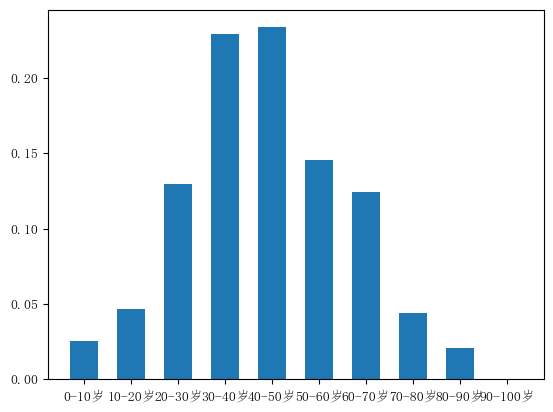

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#柱状图
bar_width = 0.6 #柱的宽度
# 在下面补充代码：根据age_list的长度生成连续整数序列，生成列表index
index = range(len(age_list))
# 在下面补充代码：根据index和value_list的值生成柱形图，柱子宽度为bar_width
plt.bar(age_list, value_list, width=bar_width)
# 在下面补充代码：将柱形图的x轴刻度标签从index改成age_list

plt.show()

可以发现确诊人员年龄主要分布在30-60岁的人群。

#### 绘制确诊、治愈、死亡占比

我们还想查看确诊患者中治愈、死亡的占比，这样可以更直观地看出治愈率和死亡率。

饼图比较适合展示这种类型的数据。

使用 matplotlib 绘制饼图和其他图表类似：

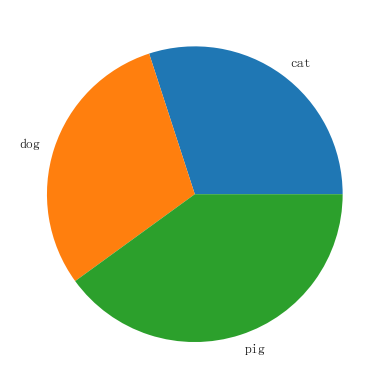

In [13]:
import matplotlib.pyplot as plt
labels = ['cat','dog','pig']
proportion = [0.3,0.3,0.4]

# 在下面补充代码：根据动物名和占比画饼图
plt.pie(proportion,labels=labels)
plt.show()

加上一些属性，让数据的展示更加直观：

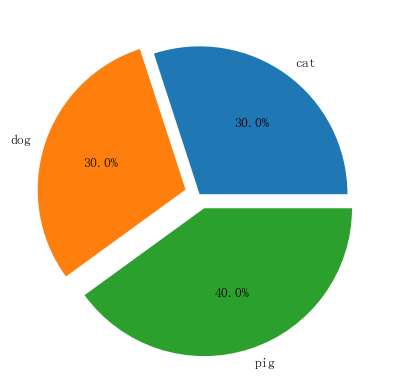

In [14]:
import matplotlib.pyplot as plt

labels = ['cat','dog','pig']
proportion = [0.3,0.3,0.4]
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0.1)  # 设置三块数据之间的间隔

# 在下面补充代码：增加间隔参数，并显示百分比（保留一位小数）
plt.pie(proportion,explode=explode,labels=labels,autopct='%0.1f%%')

plt.show()

知道了饼图的基本绘制技巧，接下来就请你根据提供的数据来绘制病患类型占比的饼图吧！

数据如下：

In [15]:
[
    {
        "name": "累计确诊",
        "value": 67856
    },
    {
        "name": "治愈",
        "value": 8828
    },
    {
        "name": "死亡",
        "value": 1536
    }
]

[{'name': '累计确诊', 'value': 67856},
 {'name': '治愈', 'value': 8828},
 {'name': '死亡', 'value': 1536}]

#### 绘制疫情地图

你的任务是根据各省的新型冠状病毒疫情数据绘制一张全国的疫情地图。

DXYArea.csv数据在课设包中已提供，请upload到data3文件夹中。

In [16]:
import pandas as pd
data = pd.read_csv('data3/DXYArea.csv')

In [17]:
data.head()

,provinceName,cityName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime
0,浙江省,温州,1075,0,190,0,448,0,71,0,2020-02-09 15:37:28.105
1,浙江省,杭州,1075,0,190,0,165,0,41,0,2020-02-09 15:37:28.105
2,浙江省,宁波,1075,0,190,0,146,0,13,0,2020-02-09 15:37:28.105
3,浙江省,台州,1075,0,190,0,138,0,27,0,2020-02-09 15:37:28.105
4,浙江省,金华,1075,0,190,0,53,0,13,0,2020-02-09 15:37:28.105


可以看到这里总共有 15 列数据，第一列是省份，第二列是省份英文名，第三列是全省确诊人数，...，最后一列为日期和时间。

如果要绘制疫情地图，我们只需要取第一列与第三列即可。

最终我们整理好的数据应该是这样：

|省份|确诊人数| 
|-|-| 
|四川省|470| 
|天津市|120| |黑龙江省|425| 
|...|...|

In [18]:
# 绘制地图示例
from pyecharts import options as opts
from pyecharts.charts import Map

keys = ['湖南','湖北','河南']
values = [100,200,300]
map = Map() # 定义 map 对象
map.add("商家A",[list(x) for x in zip(keys,values)], "china")
map.set_global_opts(title_opts=opts.TitleOpts(title="Map-基本示例"))
map.render(path = '示例1.html')

'C:\\Users\\fxq45\\JupyterNotebook\\ks3\\示例1.html'

jupyter不支持显示pyecharts图，render会将图渲染成html文件，文件路径如上。打开文件可在浏览器看到图。

地图也可以设置一些属性，让数据看起来更加直观：

In [19]:
from pyecharts import options as opts
from pyecharts.charts import Map
keys = ['湖南','湖北','河南']
values = [100,200,300]
map = Map() # 定义 map 对象
map.add("商家A",[list(x) for x in zip(keys,values)], "china")
map.set_global_opts(
            title_opts=opts.TitleOpts(title="Map-VisualMap（分段型）"),
            visualmap_opts=opts.VisualMapOpts(max_=300, is_piecewise=False),
        )
map.render(path = '示例2.html')

'C:\\Users\\fxq45\\JupyterNotebook\\ks3\\示例2.html'

结果：

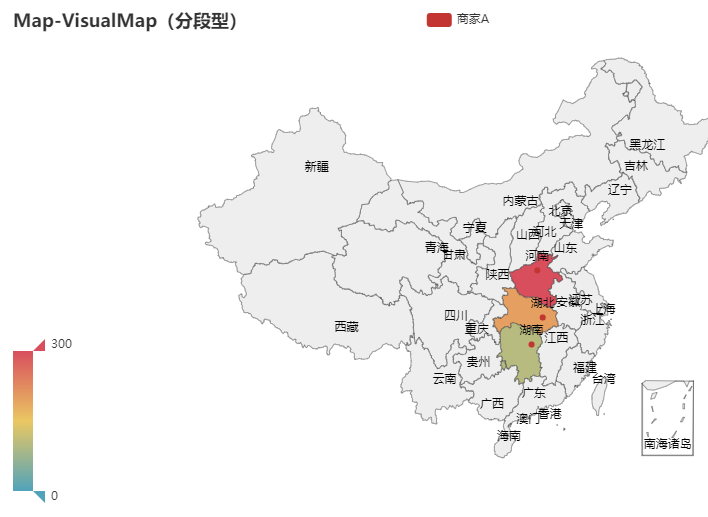

利用 pyecharts 把相应的省份和省份对应的数据传入地图对象就可以绘制出我们想要的地图。

所以接下来的工作就非常明确了，只需要我们从数据集中提取出省份和确诊人数即可。

#### 提取目标数据

要想从 csv 文件中提取出目标数据，我们需要编写代码进行数据提取的工作，打开数据集文件你会发现有很多条数据，而我们要做的工作就是从这里面提取出最新的 34 个省级行政区的确诊人数数据。

In [20]:
import csv

result = {'province':[],'province_confirmedCount':[]}
# 数据集有部分数据缺失，所以手动补上
result['province'].append('台湾') 
result['province_confirmedCount'].append(18)
result['province'].append('香港') 
result['province_confirmedCount'].append(56)
result['province'].append('澳门') 
result['province_confirmedCount'].append(10)
# 打开DXYArea.csv 文件
with open("data3/DXYArea.csv",'r',encoding='UTF-8') as csvFile:
    reader = csv.reader(csvFile) # 读取文件数据

    # 迭代取出文件中的每一行置于item中
    for item in reader:
        if reader.line_num == 1:   # 忽略第一行数据
            continue
        province_name = item[0] # 获得item中省级行政区名字
        # 在下面补充代码：获得item中确诊人数转为int类型后赋给confirmedCount变量
        confirmedCount = int( item[2] )
        #print('confirmedCount=',confirmedCount)
        # 只取最新的 34 个省级行政区数据
        if len(result['province']) == 34 :
            break
        if province_name in result['province']:
            continue
        else:
            # 在下面补充代码：将province_name追加到result中，作为'province'键的值
            result['province'].append(province_name)
            # 在下面补充代码：将confirmedCount追加到result中，作为['province_confirmedCount']键的值
            result['province_confirmedCount'].append(confirmedCount)
            #print(province_name,confirmedCount)
print(result)

{'province': ['台湾', '香港', '澳门', '浙江省', '湖北省', '四川省', '山东省', '重庆市', '河南省', '湖南省', '江苏省', '广东省', '上海市', '甘肃省', '安徽省', '天津市', '北京市', '福建省', '陕西省', '内蒙古自治区', '海南省', '宁夏回族自治区', '江西省', '山西省', '广西壮族自治区', '贵州省', '新疆维吾尔自治区', '河北省', '黑龙江省', '吉林省', '云南省', '辽宁省', '青海省', '西藏自治区'], 'province_confirmedCount': [18, 56, 10, 1075, 27100, 386, 435, 446, 1033, 838, 468, 1120, 293, 79, 779, 90, 326, 250, 208, 54, 128, 45, 740, 115, 195, 96, 45, 206, 307, 78, 140, 105, 18, 1]}


数据基本已经提取出来了，但是我们会发现这个数据和绘制地图需要的数据有一些不太一样，例如，绘制地图需要的是 ('湖南':100)，而我们现在的数据是：('湖南省',100)。

所以还需要将数据中的一些字符串删除。

可能你第一时间想到编写这样的代码：

province_name.replace('省','').replace('市','').replace('自治区','')

这样一来 replace() 函数就写的很长了：

我们可以定义一个函数来专门负责删除多余子字符串的工作。

In [21]:
import csv
result = {'province':[],'province_confirmedCount':[]}
result['province'].append('台湾') 
result['province_confirmedCount'].append(18)
result['province'].append('香港') 
result['province_confirmedCount'].append(56)
result['province'].append('澳门') 
result['province_confirmedCount'].append(10)

# 批量删除多余字符的函数
def replace_something(source_str,replace_list):
    for line in replace_list:
        source_str = source_str.replace(line,"")
    return source_str

with open("data3/DXYArea.csv",'r',encoding='UTF-8') as csvFile:
    reader = csv.reader(csvFile) # 读取文件数据
    for item in reader:
        if reader.line_num == 1:
            continue
        # 定义删除的字串列表
        replace_list = ['省','市','壮族自治区','维吾尔自治区','回族自治区','自治区']
        # 在下面补充代码：调用删除多余字符的函数,删除所有省份中的 replace_list中定义的字符串，返回值赋给province_name变量
        province_name = replace_something(item[0],replace_list)
        #print(province_name)
        if len(result['province']) == 34 :
            break
        if province_name in result['province']:
            continue
        else:
            # 在下面补充代码：将去除多余字符之后的province_name追加到result中，作为'province'键的值
            result['province'].append(province_name)
            # 在下面补充代码：获得item中确诊人数转为int类型后赋给confirmedCount变量
            confirmedCount = int( item[2] )
            # 在下面补充代码：将confirmedCount追加到result中，作为'province_confirmedCount'键的值
            result['province_confirmedCount'].append(confirmedCount)
print(result)

{'province': ['台湾', '香港', '澳门', '浙江', '湖北', '四川', '山东', '重庆', '河南', '湖南', '江苏', '广东', '上海', '甘肃', '安徽', '天津', '北京', '福建', '陕西', '内蒙古', '海南', '宁夏', '江西', '山西', '广西', '贵州', '新疆', '河北', '黑龙江', '吉林', '云南', '辽宁', '青海', '西藏'], 'province_confirmedCount': [18, 56, 10, 1075, 27100, 386, 435, 446, 1033, 838, 468, 1120, 293, 79, 779, 90, 326, 250, 208, 54, 128, 45, 740, 115, 195, 96, 45, 206, 307, 78, 140, 105, 18, 1]}


通过这一步可以发现数据已经达到要求了。

#### 绘制疫情地图
准备工作做好了，绘制地图就变得简单了：

In [22]:
# 准备数据
import csv
result = {'province':[],'province_confirmedCount':[]}
result['province'].append('台湾') 
result['province_confirmedCount'].append(18)
result['province'].append('香港') 
result['province_confirmedCount'].append(56)
result['province'].append('澳门') 
result['province_confirmedCount'].append(10)

# 批量删除多余字符的函数
def replace_something(source_str,replace_list):
    for line in replace_list:
        source_str = source_str.replace(line,"")
    return source_str

with open("data3/DXYArea.csv",'r',encoding='UTF-8') as csvFile:
    reader = csv.reader(csvFile) # 读取文件数据
    for item in reader:
        if reader.line_num == 1:
            continue
        # 定义删除的字串列表
        replace_list = ['省','市','壮族自治区','维吾尔自治区','回族自治区','自治区']
        # 调用删除字串的函数
        province_name =replace_something(item[0],replace_list) 
        if len(result['province']) == 34 :
            break
        if province_name in result['province']:
            continue
        else:
            # 在下面补充代码：将去除多余字符之后的province_name追加到result中，作为'province'键的值
            result['province'].append(province_name)
            # 在下面补充代码：获得item中确诊人数转为int类型后赋给confirmedCount变量
            confirmedCount = int( item[2] )
            # 在下面补充代码：将confirmedCount追加到result中，作为'province_confirmedCount'键的值
            result['province_confirmedCount'].append(confirmedCount)
# 绘制地图
from pyecharts import options as opts
from pyecharts.charts import Map

map = Map()
map.add("确诊人数", [list(z) for z in zip(result['province'],result['province_confirmedCount'])],'china')
# 在下面补充代码：根据以下结果画出疫情地图
map.set_global_opts(title_opts=opts.TitleOpts(title="疫情地图"))
map.render(path="疫情地图.html")

'C:\\Users\\fxq45\\JupyterNotebook\\ks3\\疫情地图.html'

结果：

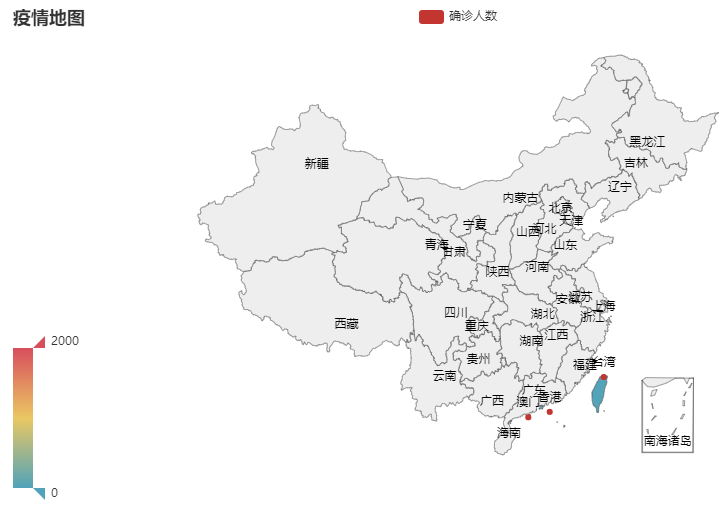

#### 绘制省市确诊人数地图
我们还想要看到省市的确诊人数信息，这样就需要绘制省市地图，利用 pyecharts 也可以实现省市地图的绘制，例如：

In [23]:
from pyecharts import options as opts
from pyecharts.charts import Map

guangdong_city = ['汕头市', '汕尾市', '揭阳市', '阳江市', '肇庆市', '广州市', '惠州市']
values = [68, 110, 65, 27, 60, 129, 43]

map = Map()
map.add("商家A", [list(z) for z in zip(guangdong_city, values)], "广东")
map.set_global_opts(title_opts=opts.TitleOpts(title="Map-广东地图"),
visualmap_opts=opts.VisualMapOpts())
map.render(path = '广东地图.html')

'C:\\Users\\fxq45\\JupyterNotebook\\ks3\\广东地图.html'

结果：

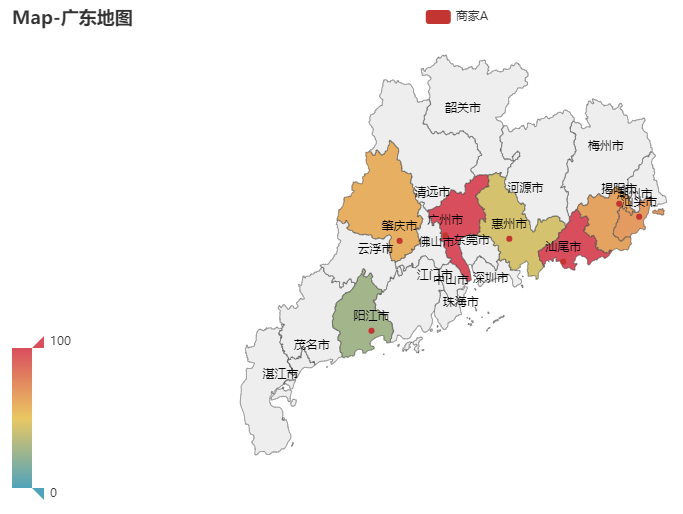

了解了如何绘制省市地图，现在有个任务要交给你：**根据数据集来绘制湖北省的确诊人数地图。**

#### 疫情数据分析

现在手里有很多城市的数据，我们想要根据这些数据分析出有哪些地级市连续 5 天确诊患者上升、哪些连续 5 天下降，如果有的话将连续下降天数持续最长的地区和连续增长天数持续最长的地区绘制成折线图。

要做这样一个数据分析，可以分为五个步骤：

1.从数据集中提取所有城市数据<br>
2.统计每个城市的每日新增确诊人数<br>
3.计算每个城市确诊人数的变化趋势<br>
4.求出确诊人数上升持续最长的城市和下降持续最长的城市<br>
5.将两座城市数据绘制成折线图<br>

#### 提取城市的数据

要获取所有城市数据，我们首先打开数据集预览一下（在本地通过 excel 打开 DXYArea.csv 文件查看效果更好）：

In [24]:
data.tail()

,provinceName,cityName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime
27516,云南省,昆明,2,0,0,0,2,0,0,0,2020-01-24 03:50:31.353
27517,山西省,太原,1,0,0,0,1,0,0,0,2020-01-24 03:50:31.353
27518,吉林省,长春,1,0,0,0,1,0,0,0,2020-01-24 03:50:31.353
27519,河北省,石家庄,1,0,0,1,1,0,0,0,2020-01-24 03:50:31.353
27520,宁夏回族自治区,银川,1,0,0,0,1,0,0,0,2020-01-24 03:50:31.353


可以发现第二列为城市名字，第七列为城市当前的确诊人数，最后一列是时间，由此我们就可以确定目标数据如何提取了。

In [25]:
import datetime
import csv
# 提取地级市数据
citys_info = {}
'''下面这条代码发什么神经，搞个空路径'''
with open("/data/shixunfiles/0628207c5264b2f970a84e3dded2c085_1591604626308.csv",'r',encoding='UTF-8') as csvFile:
    reader = csv.reader(csvFile)

    for item in reader:
        if reader.line_num == 1:
            continue
        # 计算当前日期 将字符串转换为日期时间类型 
        current_time = datetime.datetime.strptime(item[7], '%Y/%m/%d %H:%M')
        if item[1] in citys_info.keys():  # 判断是否已经有该城市数据
            # 判断上一次记录的日期与本次日期是否是同一天，如果是同一天则跳过不进行记录，只记录当天最新的数据
            last_time = citys_info[item[1]]['date'][len(citys_info[item[1]]['date']) -1] # 获取上一次的时间
            if last_time > current_time and last_time.month == current_time.month and last_time.day == current_time.day:
                continue
            else:
                # 给当前城市添加确诊人数数据与日期数据
                citys_info[item[1]]['city_confirmedCount'].append(int(item[6])) 
                citys_info[item[1]]['date'].append(current_time)
        else:
            #将日期字符串转换成 datetime 对象
            time = datetime.datetime.strptime(item[7],'%Y/%m/%d %H:%M')
            citys_info[item[1]] = {'city_confirmedCount':[int(item[6])],'date':[time]}
print(citys_info)

FileNotFoundError: [Errno 2] No such file or directory: '/data/shixunfiles/0628207c5264b2f970a84e3dded2c085_1591604626308.csv'

通过上面的代码我们已经将每个城市的数据取出来了，接下来就需要根据提取的城市数据计算每个城市的每日新增人数。

统计每日新增确诊人数

为了统计方便，我们可以将城市确诊数据不足 10 条的数据删除掉，并且将每个城市的日期列表与确诊人数列表进行翻转，因为数据集中统计是从 2 月15 日 - 1 月 24，我们将日期翻转为 1月24日 - 2 月 15 日这种方式更方便统计。

In [ ]:
del_list = [] # 定义待删除数据的列表
for key in citys_info:
    #如果数据量小于10
    if len(citys_info[key]['date']) < 10:
        del_list.append(key)
    # 翻转日期与确诊人数列表   使用 list(reversed(list_name)) 可以进行列表的翻转操作
    citys_info[key]['city_confirmedCount'] = list(reversed(citys_info[key]['city_confirmedCount'])) 
    citys_info[key]['date'] = list(reversed(citys_info[key]['date'])) 

#执行删除
for key in del_list:
    del citys_info[key]

接下来根据每个城市的每日确诊人数与前一天确诊人数计算出每日新增人数，然后存入新的列表。

In [ ]:
new_citys = {}

for key in citys_info.keys():
    last_day_num = citys_info[key]['city_confirmedCount'][0]
    for index in range(1,len(citys_info[key]['city_confirmedCount']) - 1): # 这里索引从1 开始计算
        # 计算新增人数
        current_number = citys_info[key]['city_confirmedCount'][index]
        number_changed = current_number  - last_day_num
        last_day_num = current_number
        # 存储
        if key in new_citys.keys():  # 判断是否有数据 如果有则追加，没有则初始化数据
            new_citys[key]['number_changed'].append(number_changed)
            new_citys[key]['date'].append(citys_info[key]['date'][index])
        else:
            new_citys[key] = {'number_changed':[number_changed],'date':[citys_info[key]['date'][index]]}
# 打印一条数据检验是否计算正确
print(new_citys['Shanxi'])

拿结果与数据集中陕西的数据进行对比发现计算是正确的。

#### 计算每个城市确诊人数的变化趋势
通过定义变量进行计数统计，并且将每次上升或下降的区间保存至相应列表中，最后取最大值，即可计算出，确诊人数上升的最大天数，和确诊人数下降的最大天数。

In [ ]:
# 定义连续五天以上确诊人数上升城市，和连续五天确诊人数下降城市的列表
up_city_list = []
down_city_list = []

# 计算确诊人数上升/下降的天数
for key in new_citys.keys():
    up_count = 0  #上升天数变量
    down_count = 0 #下降天数变量
    up_count_list = [] #上升天数的列表
    down_count_list = [] #下降天数的列表

    city = new_citys[key]
    last_num =  city['number_changed'][0]   # 上一次新增人数
    for index in range(1,len(city['number_changed']) -1):
        current_num = city['number_changed'][index]
        if current_num - last_num > 0:
            up_count = up_count + 1
            if down_count > 0 :
                down_count_list.append(down_count)
                down_count = 0
        elif current_num - last_num < 0: 
            down_count = down_count + 1
            if up_count > 0:
                up_count_list.append(up_count)
                up_count = 0
        else: #增长为 0 
            up_count_list.append(up_count)
            down_count_list.append(down_count)
            up_count = 0 
            down_count = 0
        last_num = current_num
    city['max_down'] = max(down_count_list)
    city['max_up'] = max(up_count_list)
    # 存储
    if city['max_down'] >= 5: # 存储确诊患者数目下降天数超过5天的城市
        city['cityname'] = key
        down_city_list.append(city)

    if city['max_up'] >= 5: # 存储确诊患者数目上升天数超过5天的城市
        city['cityname'] = key
        up_city_list.append(city)

print(down_city_list)
print(up_city_list)

通过修改参数计算和分析，可以发现截至 2 月 15 日，有不少城市连续三天每日新增确诊患者数目持续下降，其中杭州、荆州、孝感连续五天确诊患者数目下降。

不过也有城市的确诊患者是处在上升阶段，例如：温州、孝感、哈尔滨、武汉，确诊患者上升天数超过五天。

#### 数据可视化
使用图表展示数据更加直观。

首先对数据进行排序：

In [ ]:
sort_up_list = sorted(up_city_list,key = lambda item:item['max_up'],reverse=True)
sort_down_list = sorted(down_city_list,key = lambda item:item['max_down'],reverse=True)

接下来，进行绘图。

绘制确诊患者下降的城市：

In [ ]:
import matplotlib.pyplot as plt


X = sort_down_list[0]['date']
Y = sort_down_list[0]['number_changed']
x_labels = [str(time.month) + '-' + str(time.day) for time in sort_down_list[0]['date']]
plt.plot(X,Y,'o-')
plt.xticks(X,x_labels ,rotation = 45)
plt.title(sort_down_list[0]['cityname'])
plt.show()


绘制确诊患者上升的城市：

In [ ]:
import matplotlib.pyplot as plt


X = sort_up_list[0]['date']
Y = sort_up_list[0]['number_changed']
x_labels = [str(time.month) + '-' + str(time.day) for time in sort_up_list[0]['date']]
plt.plot(X,Y,'o-')
plt.xticks(X,x_labels ,rotation = 45)
plt.title(sort_up_list[0]['cityname'])
plt.show()

通过对数据进行分析和处理可以发现，面对大量的数据，在没有计算机的时候仅靠人来分析处理和计算数据是非常困难的，在有了计算机之后我们就可以将数据计算和处理的工作外包给计算机来进行，人只需要关注最终计算出来的结果即可，相当于我们的生产力一下子提升了一个量级。

因为计算机擅长计算，计算机也擅长做重复的事情，计算机从来不会觉得类，脏活累活它都愿意帮你干，只要你写好适合的程序，它就能给出你想要的答案。

这里我们解决的问题，其实不算真正意义上的大数据，毕竟我们处理的数据才几万条，大数据系统处理的数据都是动辄Tb（1Pb = 1024G） 或者 Pb 级别的。

但是大数据应用的原理其实和我们这里有很多地方重合，比如最终大数据也是要将数据展示给人来看的，这就需要数据可视化，数据从采集到存储在到分析和处理，也和我们平常获取数据，处理数据的逻辑是差不多，只是数据量更大，数据复杂度更高了。

总的来说，很多大数据系统都基本符合下面这个模型：

* 数据获取
* 数据处理与集成
* 数据存储
* 数据分析
* 具体应用
